### Import the data

In [292]:
import pandas as pd

In [293]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [294]:
# import os

# os.listdir('/content/drive/MyDrive/Colab/')

In [295]:
data = pd.read_csv("Epileptic Seizure Recognition.csv")

### Data Summary

In [296]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [297]:
data.shape

(11500, 180)

In [298]:
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

### Coverting to Binary Classification

In the data, 1 means having seizure and (2,3,4,5) means having other brain activity. So, we replace (2,3,4,5) with 0.

0 means having no seizure

1 means having seizure.



In [299]:
data['y'].replace((2,3,4,5),0, inplace=True)

In [300]:
data['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

Our data now has 2300 sample of seizure activity and 9200 samples of non-seizure activity.

In [301]:
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


### Separating Features and Target Vairables

We seperate the feature and target variable from the data so we create a variable X and y.

X holds the features

y holds the target

In [302]:
X = data.drop(['Unnamed','y'],axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [303]:
y = data['y']
y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64

In [304]:
X.shape, y.shape

((11500, 178), (11500,))

In [305]:
y.value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

# Working on Imbalanced Data

Target variable y has imbalanced dataset

2300 Seizure samples
9200 Non Seizure samples

## Train Test Split

Now we split the X and y into test and training data to fit them to model

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [307]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8050, 178), (3450, 178), (8050,), (3450,))

After splitting,

8050 Training data
3450 Test data

## Model Building

### Logistic Regression

We import the model and initialize it

In [308]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='lbfgs', max_iter=10000)

Fit the training data

In [309]:
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [310]:
y_lg = lg.predict(X_test)

##### Helper Fuction to evaluate model performance

In [311]:
def evaluate(y_pred):

    #import metrics
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt


    #Confusion Matrix
    plt.figure(figsize=(4, 3))
    cm  = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Accent", fmt='d')
    plt.show()


    # Metrices
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)

    print("--- Classification Result ---")
    print(f"\nAccuracy: {accuracy*100:.2f}% ")
    print(f"\nPrecision: {precision*100:.2f}% ")
    print(f"\nRecall: {recall*100:.2f}% ")
    


#### Model Evaluation

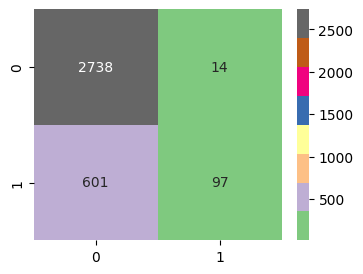

--- Classification Result ---

Accuracy: 82.17% 

Precision: 87.39% 

Recall: 13.90% 


In [312]:
evaluate(y_lg)

### Random Forest

We import and initialize the model

In [313]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

Fitting the training data

In [314]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [315]:
y_rf = rf.predict(X_test)

#### Model Evaluation

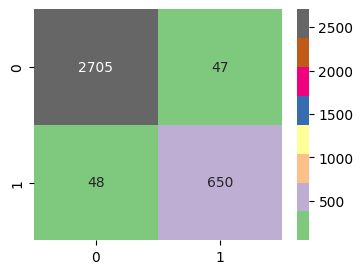

--- Classification Result ---

Accuracy: 97.25% 

Precision: 93.26% 

Recall: 93.12% 


In [316]:
evaluate(y_rf)

#### Export and Load Model

In [317]:
# import joblib

# joblib.dump(rf, 'rf.pkl')

In [318]:
# loaded_model_rf = joblib.load('rf.pkl')
# loaded_model_rf

### XG Boost

We import the model and initialize it

In [319]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

Fit the training data

In [320]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [321]:
y_xgbc = xgbc.predict(X_test)

#### Export and Load Model

Saving the Model

In [322]:
# xgbc.save_model('xgbc.h5')

Loading the Model

In [323]:
# import xgboost as xgb

# # Path to the saved model in Google Drive
# # model_path = '/content/drive/MyDrive/Colab/xgbc.h5'

# # Create an XGBClassifier object and load the model
# loaded_model = xgb.XGBClassifier()
# loaded_model.load_model('xgbc.h5')


#### Model Evaluation of XG Boost

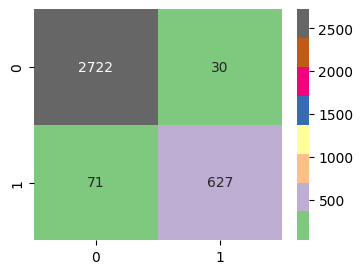

--- Classification Result ---

Accuracy: 97.07% 

Precision: 95.43% 

Recall: 89.83% 


In [324]:
evaluate(y_xgbc)

### Tuned XG Boost

We find the best parameter for the XGBC Classifier usign Gridsearch and evaluate the model

In [325]:
# from sklearn.model_selection import GridSearchCV

In [326]:
# cv_params = {'max_depth': [1,4,10],
#              'min_child_weight': [1,3,5],
#              'learning_rate': [0.1, 0.2, 0.3],
#              'n_estimators': [75, 100, 125]
#              }

# scoring = ['accuracy', 'precision', 'recall', 'f1']

# xgbc_cv = GridSearchCV(xgbc, cv_params, scoring=scoring, cv=5, refit='recall')

In [327]:
# %%time
# xgbc_cv.fit(X_train, y_train)

In [328]:
# xgbc_cv.best_params_

Fitting the model with new found best parameters

In [329]:
xgbc_tuned = XGBClassifier(learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=125)

Fit the training data

In [330]:
xgbc_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [331]:
y_xgbc_tuned =  xgbc_tuned.predict(X_test)

#### Model Evaluation of Tuned XG Boost

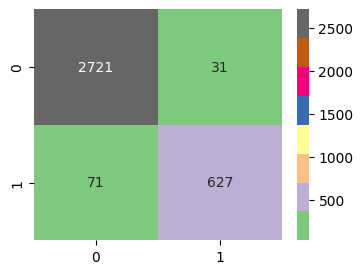

--- Classification Result ---

Accuracy: 97.04% 

Precision: 95.29% 

Recall: 89.83% 


In [332]:
evaluate(y_xgbc_tuned)

It gave very similar result. In fact, the best params from the GridSearchCV gave one incorrect result in compare to base model.

### LSTM

In [333]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

# callback = MyCallback()

# Define LSTM model
lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(178, 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model
lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [334]:
lstm.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,169 (387.38 KB)

 Trainable params: 99,169 (387.38 KB)

 Non-trainable params: 0 (0.00 B)

In [335]:
lstm.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15


252/252 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.6108 - loss: 2.2157 - val_accuracy: 0.9136 - val_loss: 0.2549
Epoch 2/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.8163 - loss: 0.6139 - val_accuracy: 0.9377 - val_loss: 0.1717
Epoch 3/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.8807 - loss: 0.3564 - val_accuracy: 0.9470 - val_loss: 0.1476
Epoch 4/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9022 - loss: 0.2938 - val_accuracy: 0.9533 - val_loss: 0.1314
Epoch 5/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9297 - loss: 0.2276 - val_accuracy: 0.9620 - val_loss: 0.1199
Epoch 6/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9404 - loss: 0.1967 - val_accuracy: 0.9606 - val_loss: 0.1070
Epoch 7/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9468 - loss: 0.1849 - val_accuracy: 0.9675 - val_loss: 0.0982
Epoch 8/15
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9551 - loss: 0.1667 - val_accurac

#### Model Evaluation

In [336]:
y_lstm = lstm.predict(X_test)
y_lstm = [1 if val > 0.5 else 0 for val in y_lstm]

108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


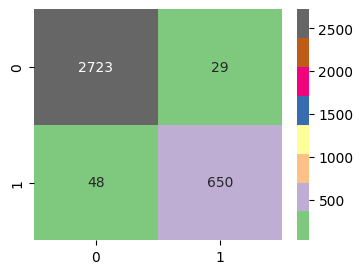

--- Classification Result ---

Accuracy: 97.77% 

Precision: 95.73% 

Recall: 93.12% 


In [337]:
evaluate(y_lstm)

# Working on Balanced Data

## SMOTE

Our training data has 6448 instances of non-seizure reading and only 1602 instances of seizure reading so we try to balance the data using SMOTE. We need to generate 6448-1602 = 4846 new data.

Import the SMOTE library and initialize it

In [338]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [339]:
X_bal_train, y_bal_train = sm.fit_resample(X_train, y_train)

Check the size of feature variable before and after SMOTE

In [340]:
X_train.shape, X_bal_train.shape

((8050, 178), (12896, 178))

Check the size of target variable before and after SMOTE

In [341]:
y_train.shape, y_bal_train.shape

((8050,), (12896,))

In [342]:
y_bal_train.value_counts()

y
0    6448
1    6448
Name: count, dtype: int64

Before SMOTE,

X_train, y_train had 8050 data 
1602 Seizure data and 6448 Non-Seizure data 

After SMOTE,

X_bal_train, y_bal_train has 12896 data
6448 Seizure data and 6448 Non-Seizure data 

## Model Building




### Logistic Regression

We import the model and initialize it

In [343]:
from sklearn.linear_model import LogisticRegression
lg_bal = LogisticRegression(solver='lbfgs', max_iter=10000)

Fit the training data

In [344]:
lg_bal.fit(X_bal_train,y_bal_train)

LogisticRegression(max_iter=10000)

In [345]:
y_bal_lg = lg_bal.predict(X_test)

#### Model Evaluation

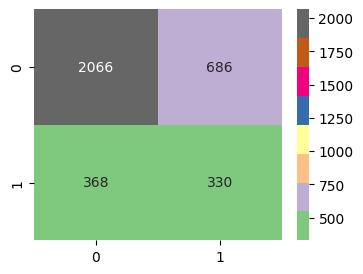

--- Classification Result ---

Accuracy: 69.45% 

Precision: 32.48% 

Recall: 47.28% 


In [346]:
evaluate(y_bal_lg)

### Random Forest

We import and initialize the model

In [347]:
from sklearn.ensemble import RandomForestClassifier
rf_bal = RandomForestClassifier()

Fitting the training data

In [348]:
rf_bal.fit(X_bal_train, y_bal_train)

RandomForestClassifier()

In [349]:
y_bal_rf = rf_bal.predict(X_test)

#### Model Evaluation

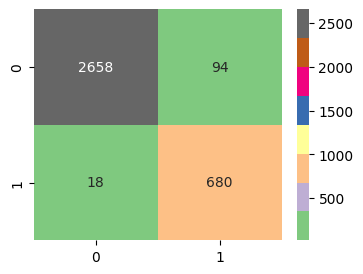

--- Classification Result ---

Accuracy: 96.75% 

Precision: 87.86% 

Recall: 97.42% 


In [350]:
evaluate(y_bal_rf)

### XGBClassifier

We import the model and initialize it

In [351]:
from xgboost import XGBClassifier
xgbc_bal = XGBClassifier()

Fit the training data

In [352]:
xgbc_bal.fit(X_bal_train, y_bal_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [353]:
y_bal_xgbc = xgbc_bal.predict(X_test)

#### Model Evaluation

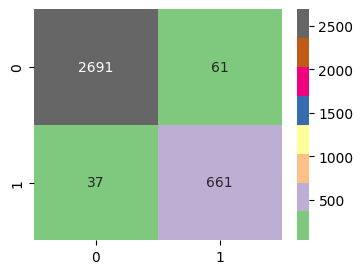

--- Classification Result ---

Accuracy: 97.16% 

Precision: 91.55% 

Recall: 94.70% 


In [354]:
result_xg = evaluate(y_bal_xgbc)
result_xg

## LSTM

Setting the callback function to stop training if accuracy hits 99%

#### Callback

In [355]:
# import tensorflow as tf

# class MyCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):

#     print(f"Epoch {epoch + 1}:")
#     print(f" - Training Loss: {logs.get('loss')}")
#     print(f" - Training Accuracy: {logs.get('accuracy')}")
#     print(f" - Validation Loss: {logs.get('val_loss')}")
#     print(f" - Validation Accuracy: {logs.get('val_accuracy')}")

#     acc = logs.get('accuracy')
#     if(acc > 0.99):
#       print("\nReached 99% accuracy so cancelling training!")

#       model.stop_training = True
    


#### LSTM Model

In [356]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

# callback = MyCallback()

# Define LSTM model
lstm_bal = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(178, 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model
lstm_bal.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

lstm_bal.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,169 (387.38 KB)

 Trainable params: 99,169 (387.38 KB)

 Non-trainable params: 0 (0.00 B)

In [357]:
lstm_bal.fit(X_bal_train, y_bal_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.5917 - loss: 1.7169 - val_accuracy: 0.8812 - val_loss: 0.3123
Epoch 2/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.8281 - loss: 0.4384 - val_accuracy: 0.8684 - val_loss: 0.3086
Epoch 3/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.8956 - loss: 0.3186 - val_accuracy: 0.9687 - val_loss: 0.0999
Epoch 4/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.9215 - loss: 0.2491 - val_accuracy: 0.9122 - val_loss: 0.2181
Epoch 5/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.9380 - loss: 0.2141 - val_accuracy: 0.9591 - val_loss: 0.1175
Epoch 6/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9474 - loss: 0.1794 - val_accuracy: 0.9064 - val_loss: 0.2530
Epoch 7/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9479 - loss: 0.1836 - val_accuracy: 0.9652 - val_loss: 0.1086
Epoch 8/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.9398 - loss: 0.1939 - 

#### Exporting and Loading Model

Saving the model in drive

In [358]:
# lstm_bal.save('lstm_bal.keras')

Loading the model from drive

In [359]:
# loaded_model = tf.keras.models.load_model('lstm_bal.keras')

In [360]:
# loaded_model.summary()

#### Model Evaluation

In [361]:
y_bal_lstm = lstm_bal.predict(X_test)
y_bal_lstm = [1 if val > 0.5 else 0 for val in y_bal_lstm]

108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


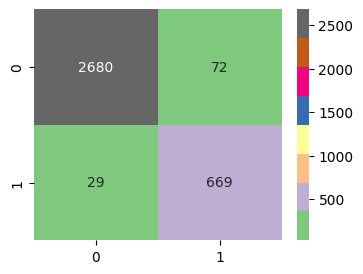

--- Classification Result ---

Accuracy: 97.07% 

Precision: 90.28% 

Recall: 95.85% 


In [362]:
evaluate(y_bal_lstm)

In [363]:
from imblearn.combine import SMOTEENN

The general pattern is the increase in recall and slight decrease in the precision value that is as expected in the binary classification.
Before balancing there were less positive in the data so model could not predict all the positives and when it did, it made sure it is correct but missed a lot of postives resulting in false negative prediction.

After balancing the data. model was able to find most of the positive but in the process it managed to mark negatives as postives resulting lots of false positives.